# Example - Transform Bounds

The [rio.transform_bounds()](../rioxarray.rst#rioxarray.rioxarray.XRasterBase.transform_bounds)
method allows you to correctly estimate
the bounds of your raster in a different CRS without
needing to re-project it. If you simply calculate the bounds
by transforming the bounds, there are often situations when
this is incorrect due to nonlinear transformations.

In [1]:
import pyproj
import rioxarray # for the extension to load
import xarray
from shapely.geometry import box

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
xds = xarray.open_dataarray("../../test/test_data/input/MODIS_ARRAY.nc")
transformer = pyproj.Transformer.from_crs(xds.rio.crs, "EPSG:4326", always_xy=True)

## Original Raster & Bounds

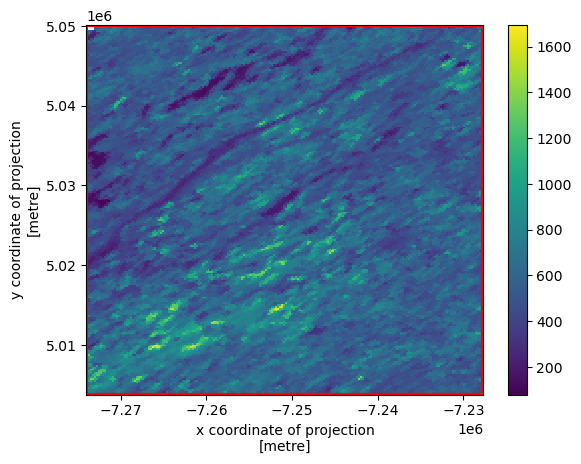

In [3]:
ax = plt.subplot()
xds.plot(ax=ax)
ax.plot(
    *box(*xds.rio.bounds()).exterior.xy,
    color="red",
    linewidth=3,
)

## Determine bounds of re-projected raster

The [rio.transform_bounds()](../rioxarray.rst#rioxarray.rioxarray.XRasterBase.transform_bounds) method allows you to safely convert a bounding box into another projection taking into account the effects of nonlinear transformations.

In [4]:
reprojected_raster = xds.rio.reproject("EPSG:4326")

### Boundary calculated from the re-projected raster (inefficient)

This is the benchmark. However, this method is computationally
inefficient. So, if you don't need to re-project, [rio.transform_bounds()](../rioxarray.rst#rioxarray.rioxarray.XRasterBase.transform_bounds) is a more efficent method.

In [5]:
reprojected_raster_box = box(*reprojected_raster.rio.bounds())

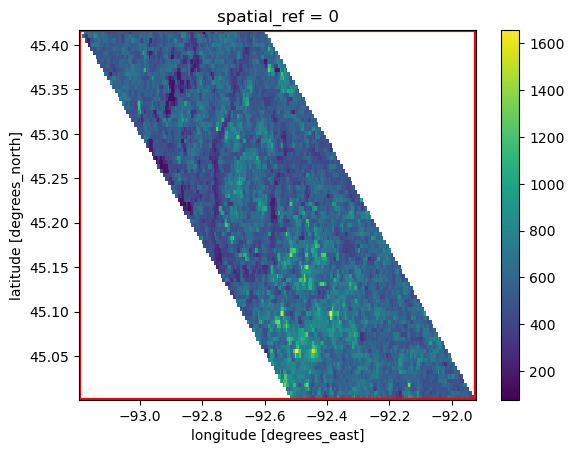

In [6]:
ax = plt.subplot()
reprojected_raster.plot(ax=ax)
ax.plot(
    *reprojected_raster_box.exterior.xy,
    color="red",
    linewidth=3,
)

### Boundary calculated from original corners (incorrect)

Directly transforming the corners is an incorrect method to calculate the new boundary.

In [7]:
transform_box = box(*transformer.transform(*xds.rio.bounds()))

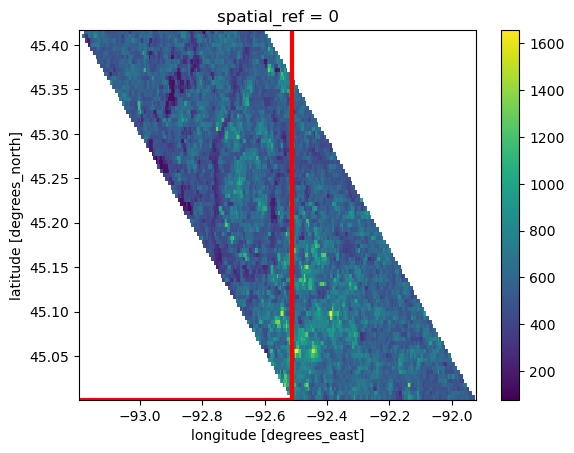

In [8]:
ax = plt.subplot()
reprojected_raster.plot(ax=ax)
ax.plot(
    *transform_box.exterior.xy,
    color="red",
    linewidth=3,
)

### Boundary calculates using transform_bounds

[rio.transform_bounds()](../rioxarray.rst#rioxarray.rioxarray.XRasterBase.transform_bounds) is both computationally efficient and a correct method for calculating the bounds of your raster in the new projection.

In [9]:
transform_bounds_box = box(*xds.rio.transform_bounds("EPSG:4326"))

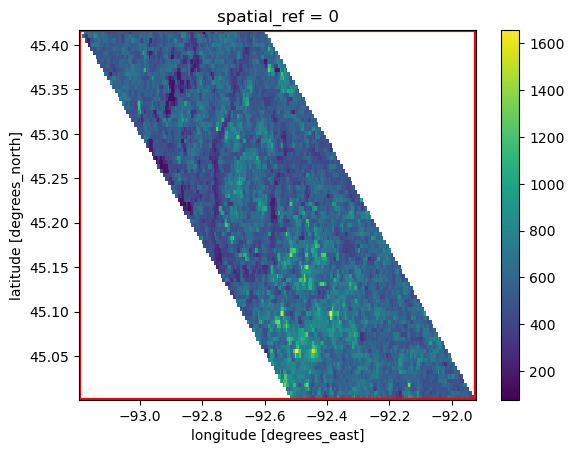

In [10]:
ax = plt.subplot()
reprojected_raster.plot(ax=ax)
ax.plot(
    *transform_bounds_box.exterior.xy,
    color="red",
    linewidth=3,
)

As seen below, this is equivalent to the [Transformer.transform_bounds](https://pyproj4.github.io/pyproj/stable/api/transformer.html#pyproj.transformer.Transformer.transform_bounds) method in pyproj:

In [11]:
pyproj_transform_bounds_box = box(*transformer.transform_bounds(*xds.rio.bounds()))

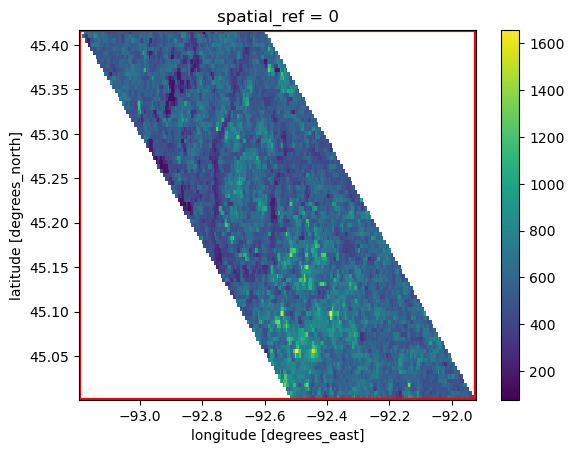

In [12]:
ax = plt.subplot()
reprojected_raster.plot(ax=ax)
ax.plot(
    *transform_bounds_box.exterior.xy,
    color="red",
    linewidth=3,
)